# Koopman operator

Consider the map between $\mathcal{M}$

$$x\in \mathcal{M} \rightarrow F(x)\in \mathcal{M}$$

The associated Koopman operator $\mathcal{K}$ between function space on $\mathcal{M}$

$$(\mathcal{K} \phi)(x) = \phi(F(x)) \qquad \forall \phi$$

When $\mathcal{K}$ is well understood, namely its eigen pairs are computated 

$$\mathcal{K} \psi_i = \lambda_i \psi_i \qquad i = 1,2,3,\cdots$$

Let $I(x) = \sum_i v_i \psi_i(x)$, here $I$ is the identity map, then 

$$F(x) = (\mathcal{K} I)(x) = (\mathcal{K}  \sum_i v_i \psi_i)(x) = \sum_i \lambda_i v_i \psi_i(x)$$

Here we call $v_i$ the Koopman mode and $\lambda_i$ $\psi_i$ Koopman eigenvalue and eigenfunction, respectively.

How to compute eigen pairs of the Koopman operator?

# (Extending) Dynamic mode decomposition

Choose finite set of function in the function space on $\mathcal{M}$ as the bases

$$\phi_1, \phi_2, \cdots \phi_{N_k}$$

Let $\Phi = [\phi_1\, \phi_2\, \cdots \phi_{N_k}] \in R^{1 \times N_k}$, since $\mathcal{K}$ is linear, we have 

$$\mathcal{K}(\sum_i a_i \phi_i) \approx \sum_i a_i \mathcal{K}(\phi_i) =  \Phi K a$$

Based on the definition of Koopman operator 

$$\mathcal{K}(\sum_i a_i \phi_i) =  \sum_i a_i \phi_i(F(x)) = \Phi(F(x)) a$$

When we have data pairs $(x_i,\,y_i)_{i=1}^{m}$ from the map $F$, we can approximate $K$ by minimizing

$$
\begin{align*}
\begin{bmatrix}
\Phi(x_1) \\
\Phi(x_2)\\
\vdots \\
\Phi(x_m)
\end{bmatrix}
K   
- 
\begin{bmatrix}
\Phi(y_1) \\
\Phi(y_2)\\
\vdots \\
\Phi(y_m)
\end{bmatrix}
\end{align*}
$$


Once we obtain the eigen pairs of $K$


$$K \xi_i = \lambda_i \xi_i \qquad i = 1,2,3,\cdots$$

Then we have 

$$\mathcal{K}(\Phi \xi_i ) = \Phi K \xi_i = \lambda_i \Phi \xi_i$$

And therefore, we have eigen pairs $(\lambda_i, \psi_i = \Phi \xi_i)$ for $\mathcal{K}$, the Koopman modes are 

$$x = I(x) = \sum_i v_i\Phi(x)\xi_i = \sum_i v_i \psi_i$$

Assume $x = B^T \Phi(x)^T$, we have

$$x =  B^T \Phi(x)^T = B^T \Bigl([\psi_1\,\psi_2\cdots\psi_{N_k}][\xi_1\,\xi_2\cdots\xi_{N_k}]^{-1}\Bigr)^T
= B^T [\xi_1\,\xi_2\cdots\xi_{N_k}]^{-T} [\psi_1\,\psi_2\cdots\psi_{N_k}]^T
$$

Therefore, 
$$[v_1,\,v_2,\,\cdots v_{N_k}] = B^T [\xi_1\,\xi_2\cdots\xi_{N_k}]^{-T}$$

## Compute eigenpairs of $K$ 

When $N_k \gg m$, we introduce kernel 

$$\kappa(x, z) = \Phi(x) \Phi(z)^T$$

Let introduce 
$$
\begin{align*}
\Phi_x = \begin{bmatrix}
\Phi(x_1) \\
\Phi(x_2)\\
\vdots \\
\Phi(x_m)
\end{bmatrix}
 = Q \Sigma Z^T
\qquad 
\Phi_y =
\begin{bmatrix}
\Phi(y_1) \\
\Phi(y_2)\\
\vdots \\
\Phi(y_m)
\end{bmatrix}
\end{align*}
$$

Let consider $K = Z\Sigma^{-1}Q^T \Phi_y$ and denote $\hat{K} = \Sigma^{-1}Q^T \Phi_y Z$, for any eigen pair $\lambda_i,\, \hat\xi_i$ of $\hat{K}$

$$K Z\hat\xi_i =  Z\Sigma^{-1}Q^T \Phi_y Z\hat\xi_i  = \lambda_i Z\hat\xi_i$$

And therefore, $\lambda_i,\, Z\hat\xi_i$ is the eigen pair of $K$.

We can compute $\hat K$, as following, 
$\hat K = \Sigma^{-1}Q^T \Phi_y Z = \Sigma^{-1}Q^T \Phi_y \Phi_x^T Q \Sigma^{-1}$.

## Compute Koopman modes

The Koopman modes are 

$$x = I(x) = \sum_i v_i\Phi(x)\xi_i = \sum_i v_i\Phi(x) Z \hat \xi_i$$

We rewrite it in the matrix form



$$
\begin{align}
X &= [x_1^T;\,x_2^T;\,\cdots x_m^T] =  \Phi_x Z[\hat\xi_1,\,\hat\xi_2,\cdots,\,\hat\xi_m] [v_1^T;\,v_2^T;\,\cdots v_m^T] \\
  &=  Q\Sigma [\hat\xi_1,\,\hat\xi_2,\cdots,\,\hat\xi_m] [v_1^T;\,v_2^T;\,\cdots v_m^T]
\end{align}
$$




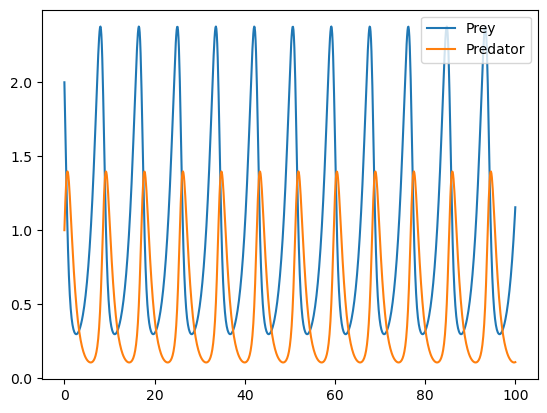

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/huang/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


PyObject <matplotlib.legend.Legend object at 0x1949e4790>

In [3]:
f = Lotka_Volterra
x0 = [2.0; 1.0]
θ = [2.0/3.0  ; 4.0/3.0 ; 1.0  ; 1.0]
Δt, N_t = 0.1, 1000
xs = compute_ODE_RK4(f, x0, θ, Δt, N_t)

ts = Δt*Array(0:1000)

plot(ts, xs[1, :], label="Prey")
plot(ts, xs[2, :], label="Predator")
legend()

In [6]:
X, Y = xs[:, 2:end], xs[:, 1:end-1]

U, S, Vh = svd(X, full=false)

        

SVD{Float64, Float64, Matrix{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.923994  -0.382406
 -0.382406   0.923994
singular values:
2-element Vector{Float64}:
 40.40225736618159
 15.282213799455157
Vt factor:
2×1000 Matrix{Float64}:
 -0.0528979  -0.0502509  -0.0473758  …  -0.0247836  -0.0260735  -0.0274349
  0.0198471   0.0290744   0.0376627     -0.0196368  -0.0209972  -0.0223918

In [ ]:
if self.n_rank !== nothing
            U = U[:, :n_rank]
            S = S[:n_rank]
            Vh = Vh[:n_rank, :]
        end

        # Compute the DMD matrix using the pseudoinverse of X
        self._Atilde = U'*Y*.T.dot(Y).dot(Vh.T)/S

        # Eigensolve gives modes and eigenvalues
        self._evals, self._mode_coeffs = np.linalg.eig(self._Atilde)

